In [1]:
#Topic Modelling for a corpus of PubMed Abstracts
#15068 abstracts converted into a .csv corpus
#Preprocessing the text
#Coherence Score Calculated
#Topic-Document matrix output

In [2]:
import functions

In [3]:
functions.outputs.make_csv("/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Abstracts", "txt")

In [4]:
#csv called corpus.csv saved to current working directory

In [6]:
import pandas as pd
import csv

df=pd.read_csv('corpus.csv', encoding = 'unicode_escape', encoding_errors = 'ignore', engine ='c')
print("There are a total of {} Abstracts".format(len(df)))
df.head()

There are a total of 15068 Abstracts


,name,text
0,10024918.txt,\n1. QJM. 1998 Sep;91(9):635-40.\n\nDelay in p...
1,10025429.txt,\n1. Arch Neurol. 1999 Feb;56(2):229-34.\n\nMo...
2,10025786.txt,\n1. Neurology. 1999 Feb;52(3):551-6.\n\nA cro...
3,10026657.txt,\n1. J Gerontol A Biol Sci Med Sci. 1999 Jan;5...
4,10027037.txt,\n1. Acta Anaesthesiol Scand. 1999 Feb;43(2):2...


In [7]:
df['processed_text'] = df['text'].apply(functions.processing.preprocess)
df.head()

,name,text,processed_text
0,10024918.txt,\n1. QJM. 1998 Sep;91(9):635-40.\n\nDelay in p...,"[qjm, sepdelay, presentation, patient, acute, ..."
1,10025429.txt,\n1. Arch Neurol. 1999 Feb;56(2):229-34.\n\nMo...,"[arch, neurol, febmonitore, venous, hemodynami..."
2,10025786.txt,\n1. Neurology. 1999 Feb;52(3):551-6.\n\nA cro...,"[neurology, feba, crossethnic, analysis, risk,..."
3,10026657.txt,\n1. J Gerontol A Biol Sci Med Sci. 1999 Jan;5...,"[gerontol, biol, sci, med, sci, janmserum, ant..."
4,10027037.txt,\n1. Acta Anaesthesiol Scand. 1999 Feb;43(2):2...,"[acta, anaesthesiol, scand, febpituitary, apop..."


In [8]:
df["word_count"] = df["processed_text"].apply(lambda x: len(x))
df.head()

,name,text,processed_text,word_count
0,10024918.txt,\n1. QJM. 1998 Sep;91(9):635-40.\n\nDelay in p...,"[qjm, sepdelay, presentation, patient, acute, ...",119
1,10025429.txt,\n1. Arch Neurol. 1999 Feb;56(2):229-34.\n\nMo...,"[arch, neurol, febmonitore, venous, hemodynami...",188
2,10025786.txt,\n1. Neurology. 1999 Feb;52(3):551-6.\n\nA cro...,"[neurology, feba, crossethnic, analysis, risk,...",194
3,10026657.txt,\n1. J Gerontol A Biol Sci Med Sci. 1999 Jan;5...,"[gerontol, biol, sci, med, sci, janmserum, ant...",147
4,10027037.txt,\n1. Acta Anaesthesiol Scand. 1999 Feb;43(2):2...,"[acta, anaesthesiol, scand, febpituitary, apop...",123


In [9]:
# Descriptive statistics for word count
df['word_count'].describe()

count    15068.000000
mean       140.007566
std         81.603395
min          0.000000
25%         92.000000
50%        136.000000
75%        181.000000
max       2702.000000
Name: word_count, dtype: float64

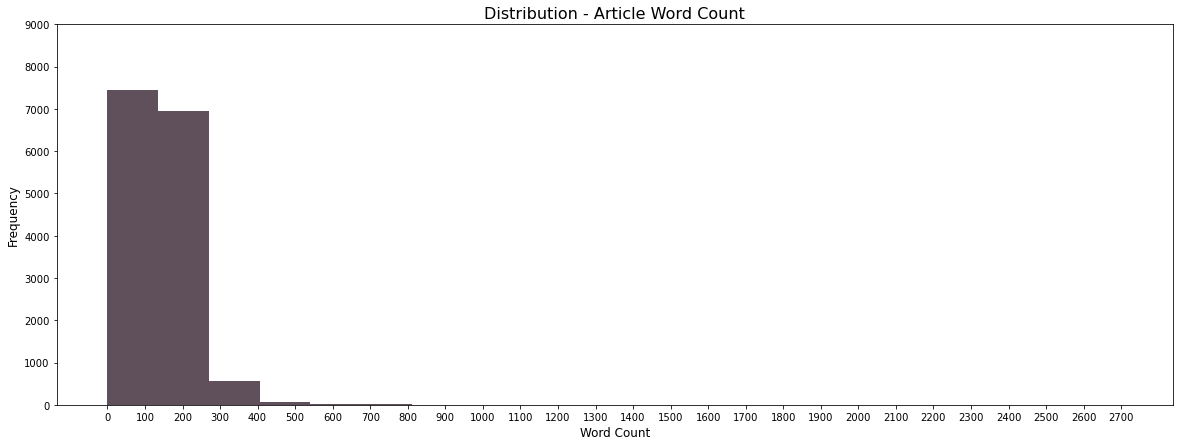

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Plot a hist of the word counts
fig = plt.figure(figsize=(20,7))

plt.hist(
    df['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 10000, 1000))
plt.xticks(np.arange(0, 2800, 100))

file_name = 'hist'

plt.show()

In [14]:
from collections import Counter

# Get the top 20 most common words among all the articles
p_text = df['processed_text']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,patient,31720
1,university,14005
2,index,13984
3,consciousness,13903
4,information,13338
5,medline,13323
6,department,10290
7,case,9912
8,hospital,9765
9,study,9582


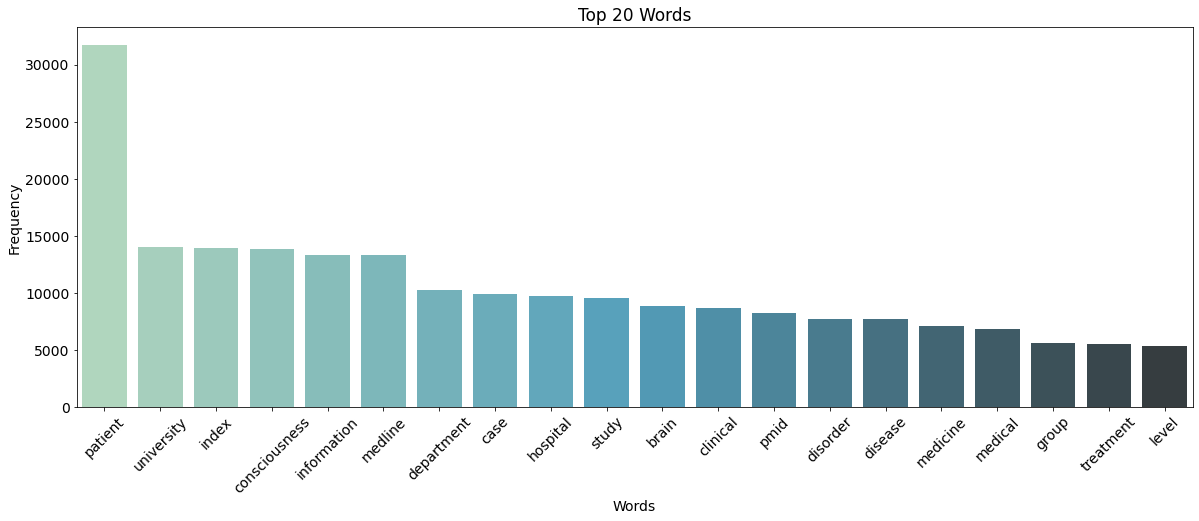

In [15]:
import seaborn as sns

# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)

plt.show()

In [16]:
# Get the number of unique words after processing
num_unique_words = len(set(p_text))
num_unique_words

262469

In [17]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter

In [18]:
brain_areas_dict = functions.os_level.makedict("/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Inputs/full_dictionary.txt")
brain_areas_dict

['primary_somatosensory_cortex',
 'postcentral_gyrus',
 'primary_motor_cortex',
 'precentral_gyrus',
 'somatosensory_association_cortex',
 'superior_parietal_lobule',
 'premotor_cortex',
 'supplementary_motor_cortex',
 'frontal_eye_fields',
 'dorsolateral_prefrontal_cortex',
 'anterior_prefrontal_cortex',
 'orbitofrontal_area',
 'orbital_gyrus',
 'gyrus_rectus',
 'rostral_gyrus',
 'superior_frontal_gyrus',
 'insular_cortex',
 'primary_visual_cortex',
 'secondary_visual_cortex',
 'associative_visual_cortex',
 'inferior_temporal_gyrus',
 'middle_temporal_gyrus',
 'superior_temporal_gyrus',
 'cingulate_cortex',
 'subgenual_area',
 'ectosplenial',
 'retrosplenial_region',
 'cerebral_cortex',
 'piriform_cortex',
 'dorsal_entorhinal_cortex',
 'perirhinal_cortex',
 'ectorhinal_area',
 'fusiform_gyrus',
 'temporal_pole',
 'angular_gyrus',
 'supramarginal_gyrus',
 'primary_auditory_cortex',
 'heschl_gyrus',
 'primary_gustatory_cortex',
 'broca_area',
 'pars_opercularis',
 'inferior_frontal_gyru

In [19]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = df['processed_text']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below = 3,
    no_above=0.85,
    #keep_n=5000, removed so that we're not setting a limit for number of words
    keep_tokens = brain_areas_dict
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 75 + 1, 5))

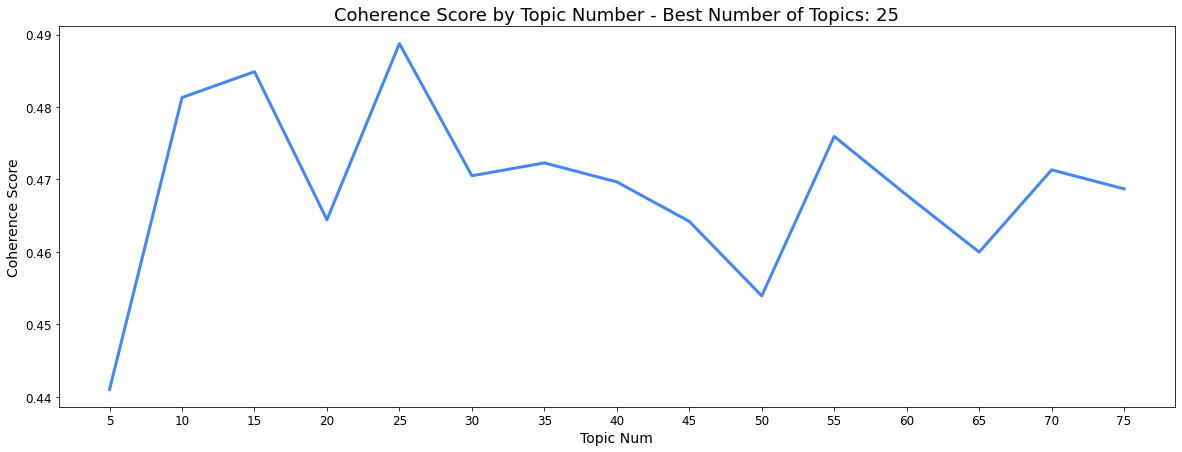

In [20]:
# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(20, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [21]:
# Now use the number of topics with the 
# highest coherence score to run the 
# sklearn nmf model

texts = df['processed_text']

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    #max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names()

# Run the nmf model
nmf = NMF(
    n_components=best_num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

In [22]:
#functions for creating topic display table 

from nltk.tokenize import TweetTokenizer, RegexpTokenizer

def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)

def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]  

def whitespace_tokenizer(text): 
    pattern = r"(?u)\b\w\w+\b" 
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens

# Funtion to remove duplicate words
def unique_words(text): 
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist

In [23]:
# Use the top words for each cluster by tfidf weight
# to create 'topics'

# Getting a df with each topic by document
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

n_top_words = 8

topic_df = topic_table(
    nmf,
    tfidf_fn,
    n_top_words
).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df.head(25)

,0,1,2,3,4,5,6,7,topics
0,patient,year,age,group,study,outcome,mortality,clinical,patient year age group study outcome mortality...
1,memory,experience,disorder,cognitive,process,model,dissociation,psychology,memory experience disorder cognitive process m...
2,stroke,ischemic,acute,ischemic stroke,stroke patient,acute stroke,ci,mortality,stroke ischemic acute patient ci mortality
3,doc,state,mcs,conscious,minimally,patient,disorder consciousness,lige,doc state mcs conscious minimally patient diso...
4,injury,tbi,brain injury,brain,traumatic,head,traumatic brain,mtbi,injury tbi brain traumatic head mtbi
5,university,medicine,school,medical,neurology,center,department,science,university medicine school medical neurology c...
6,artery,cerebral,carotid,aneurysm,occlusion,infarction,leave,carotid artery,artery cerebral carotid aneurysm occlusion inf...
7,seizure,epilepsy,eeg,epileptic,ictal,epilepticus,partial,status,seizure epilepsy eeg epileptic ictal epileptic...
8,syncope,cardiac,loss,loss consciousness,cause,heart,transient,transient loss,syncope cardiac loss consciousness cause heart...
9,rat,group,effect,increase,blood,pressure,control,response,rat group effect increase blood pressure contr...


In [24]:
# Create a df with only the created topics and topic num
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

topic_df #There should be 10 topics based on coherence test

,topic_num,topics
0,0,patient year age group study outcome mortality...
1,1,memory experience disorder cognitive process m...
2,2,stroke ischemic acute patient ci mortality
3,3,doc state mcs conscious minimally patient diso...
4,4,injury tbi brain traumatic head mtbi
5,5,university medicine school medical neurology c...
6,6,artery cerebral carotid aneurysm occlusion inf...
7,7,seizure epilepsy eeg epileptic ictal epileptic...
8,8,syncope cardiac loss consciousness cause heart...
9,9,rat group effect increase blood pressure contr...


In [25]:
# Creating a temp df with the url and topic num to join on
name = df['name'].tolist()

df_temp = pd.DataFrame({
    'name': name,
    'topic_num': docweights.argmax(axis=1)
})

# Merging to get the topic num with url
merged_topic = df_temp.merge(
    topic_df,
    on='topic_num',
    how='left'
)

# Merging with the original df
df_topics = pd.merge(
    df,
    merged_topic,
    on='name',
    how='left'
)

df_topics = df_topics.drop(
    'text',
    axis=1
)

df_topics.head(10)

,name,processed_text,word_count,topic_num,topics
0,10024918.txt,"[qjm, sepdelay, presentation, patient, acute, ...",119,2,stroke ischemic acute patient ci mortality
1,10025429.txt,"[arch, neurol, febmonitore, venous, hemodynami...",188,9,rat group effect increase blood pressure contr...
2,10025786.txt,"[neurology, feba, crossethnic, analysis, risk,...",194,23,health risk factor public disease study community
3,10026657.txt,"[gerontol, biol, sci, med, sci, janmserum, ant...",147,20,delirium dementia cognitive postoperative symp...
4,10027037.txt,"[acta, anaesthesiol, scand, febpituitary, apop...",123,18,case syndrome report disease treatment symptom...
5,10027130.txt,"[perinat, me, risk, factor, maternal, conditio...",156,12,care intensive unit pain ventilation icu
6,10029032.txt,"[trauma, febthe, utility, head, compute, tomog...",155,4,injury tbi brain traumatic head mtbi
7,10051932.txt,"[anaesth, decepidural, analgesia, child, cereb...",158,10,child pediatric children pediatr age departmen...
8,1005653.txt,"[med, octclinical, biological, pathogenic, fea...",148,18,case syndrome report disease treatment symptom...
9,1005656.txt,"[med, octpneumococcal, meningitis, clinical, l...",110,24,encephalitis infection csf virus meningitis fl...


In [26]:
# Showing the 3 matrices we get witn nmf
A = tfidf_vectorizer.transform(texts) 
W = nmf.components_
H = nmf.transform(A)

print('A = {} x {}'.format(A.shape[0], A.shape[1])) #Document x Term
print('W = {} x {}'.format(W.shape[0], W.shape[1])) #Topic x Term
print('H = {} x {}'.format(H.shape[0], H.shape[1])) # Document x Topic

A = 15068 x 117057
W = 25 x 117057
H = 15068 x 25


In [27]:
#Save it
df_topics.to_csv('H_DocumentTopicMatrix.csv')
topic_df.to_csv("TopicList.csv")

<span><h2 style="background-color: #FFFF00; color: #000000" >Todo: Review topic list and consider quality</h2></span>

In [25]:
#remove empty "processed_text" strings that are non-english
print("Initial number of papers: {}".format(len(df)))
df_relevant = df_topics[~(df_topics.word_count == 0)]
print("Non-English papers removed: {}".format(len(df) - len(df_relevant)))

#remove all texts that don't align with relevant topics
df_relevant = df_relevant[~(df_relevant.topics == "patient year age group study outcome mortality clinical")]
df_relevant = df_relevant[~(df_relevant.topics == "stroke ischemic infarction nihss patient acute")]
df_relevant = df_relevant[~(df_relevant.topics == "covid sarscov coronavirus infection patient disease respiratory neurological")]
df_relevant = df_relevant[~(df_relevant.topics == "experience health life participant disorder mental self social")]
df_relevant = df_relevant[~(df_relevant.topics == "encephalitis csf case mri lesion antibody antinmdar day")]
df_relevant = df_relevant[~(df_relevant.topics == "delirium care group mortality respiratory disease risk hospital")]
df_relevant = df_relevant[~(df_relevant.topics == "seizure syncope eeg epilepsy ictal epileptic sleep false")]

print("Irrelevant papers removed: {}".format(len(df) - len(df_relevant)))
print("Papers Remaining: {}".format(len(df_relevant)))
df_relevant.head(10)

Initial number of papers: 2239
Non-English papers removed: 62
Irrelevant papers removed: 1713
Papers Remaining: 526


,name,processed_text,word_count,topic_num,topics
7,10220461.txt,"[pqpproc, natl, acad, sci, usavol, pp, april, ...",2901,5,network connectivity brain cortex functional a...
17,10567502.txt,"[short, reportglasgow, head, injury, outcome, ...",1419,8,tbi injury traumatic brain score mtbi
23,10616795.txt,"[effect, jtp, novel, thyrotropinreleasing, hor...",2246,5,network connectivity brain cortex functional a...
27,10658984.txt,"[original, articleshigh, yield, criterion, eme...",1044,8,tbi injury traumatic brain score mtbi
32,10739426.txt,"[psychiatry, april, brief, reportsposttraumati...",765,8,tbi injury traumatic brain score mtbi
51,11215212.txt,"[dementia, lewy, body, dlb, dlb, dlb, dlb, dlb...",675,8,tbi injury traumatic brain score mtbi
72,11723193.txt,"[relation, brain, displacement, localcerebral,...",2160,5,network connectivity brain cortex functional a...
74,11737908.txt,"[crash, corticosteroid, randomisation, signifi...",773,8,tbi injury traumatic brain score mtbi
80,11839831.txt,"[special, articlecme, minimally, conscious, st...",2492,1,mcs doc crsr uws vs vegetative state vsuws
95,1214015.txt,"[clin, path, platelet, aggregability, relation...",1216,8,tbi injury traumatic brain score mtbi


In [26]:
df_relevant.to_csv('H_RelevantDocumentTopicMatrix.csv')